In [166]:
import numpy as np #导入NumPy数学工具箱
import pandas as pd #导入Pandas数据处理工具箱
df_bank = pd.read_csv("/Users/mollytsai/电子资源-零基础学机器学习/第5课 深层神经网络/教学用例 银行客户流失/数据集/BankCustomer.csv") # 读取文件
df_bank.head() # 显示文件前5行

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


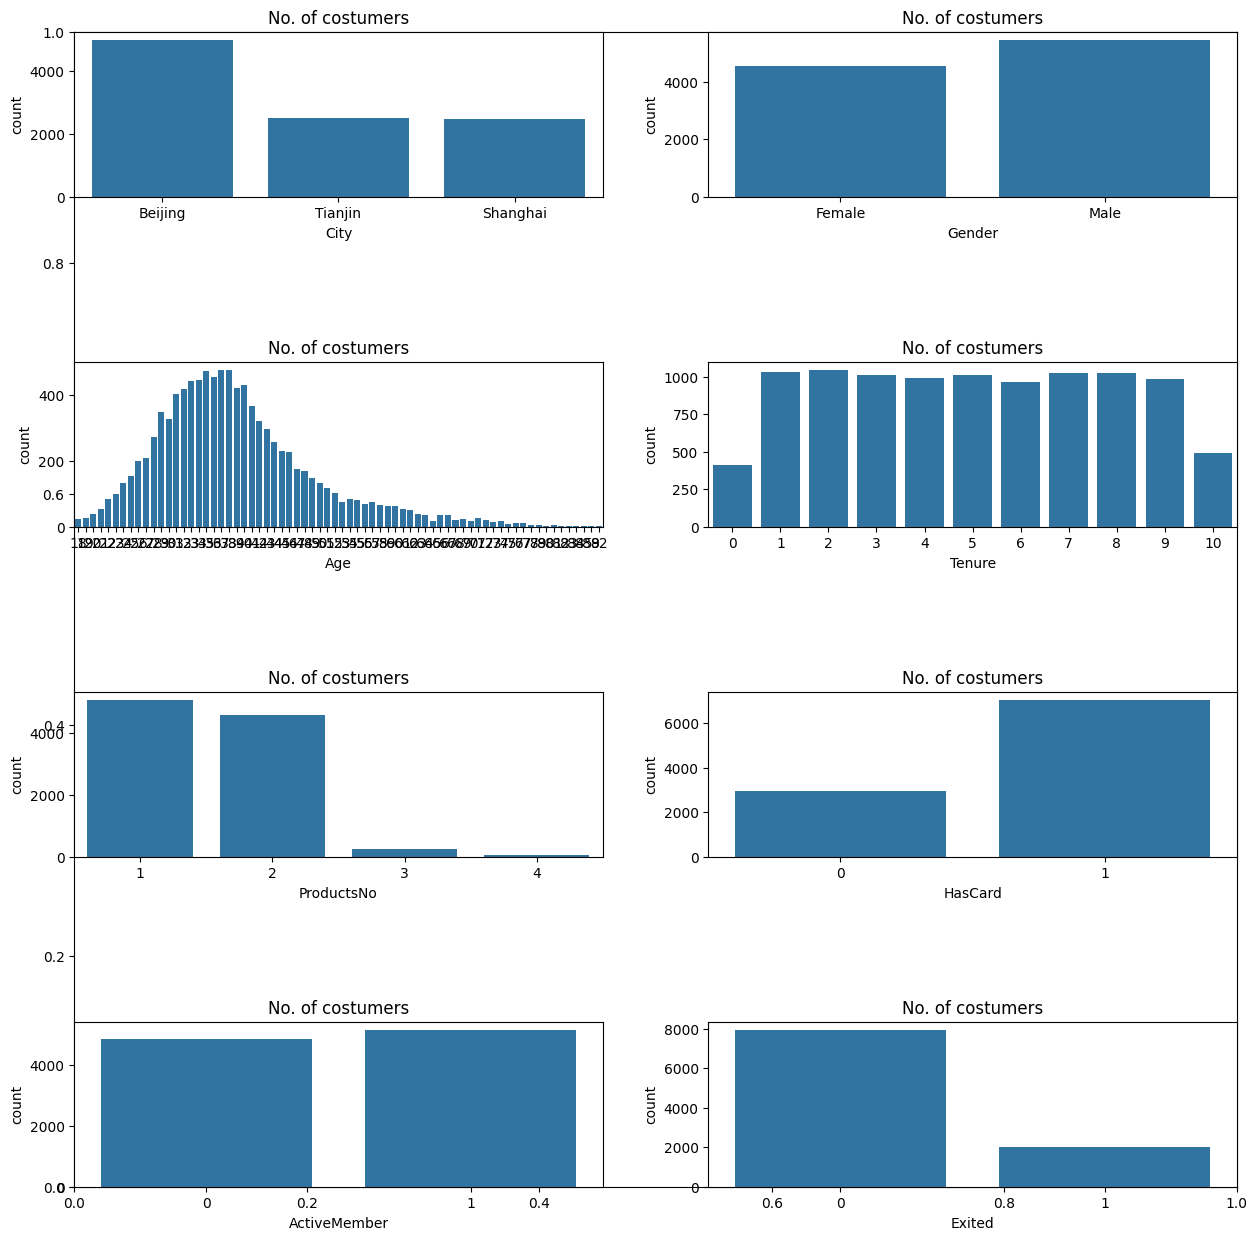

In [167]:
import matplotlib.pyplot as plt #导入matplotlib画图工具箱
import seaborn as sns #导入seaborn画图工具箱
# 显示不同特征的分布情况
features=[ 'City', 'Gender','Age','Tenure', 
           'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_bank)
    plt.title("No. of costumers")

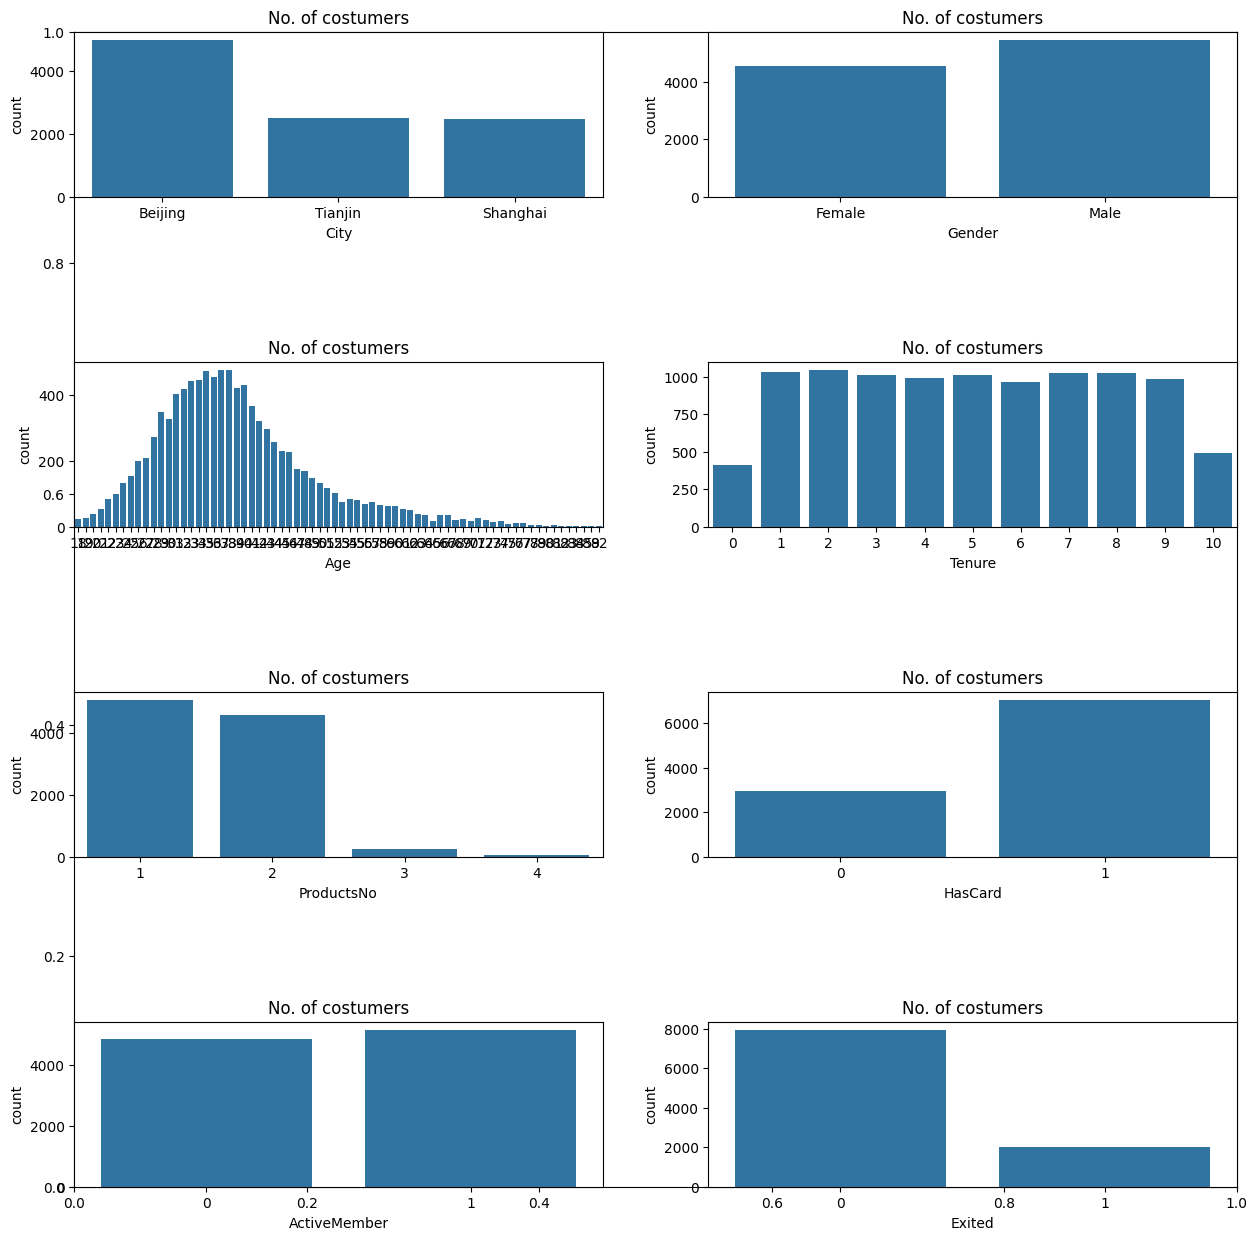

In [168]:
import matplotlib.pyplot as plt #导入matplotlib画图工具箱
import seaborn as sns #导入seaborn画图工具箱
# 显示不同特征的分布情况
features=[ 'City', 'Gender','Age','Tenure', 
           'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_bank)
    plt.title("No. of costumers")

In [169]:
# 把二元类别文本数字化
df_bank['Gender'].replace("Female",0,inplace = True)
df_bank['Gender'].replace("Male",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_bank['Gender'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix = "City")
#df_bank = [df_bank, d_city]
#df_bank = pd.concat(df_bank, axis = 1)
df_bank = pd.concat([df_bank, d_city], axis=1)
# 构建特征和标签集合
y = df_bank ['Exited']
X = df_bank.drop(['Name', 'Exited','City'], axis=1)
X.head() #显示新的特征集

Gender unique values [0 1]


/var/folders/rk/lr0blqfs77z4ycrn1d7px9n80000gn/T/ipykernel_34059/1667898963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Gender'].replace("Female",0,inplace = True)
/var/folders/rk/lr0blqfs77z4ycrn1d7px9n80000gn/T/ipykernel_34059/1667898963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,True,False,False
1,1,69,6,2,0,1,682,28605.00,0.0000,True,False,False
2,0,32,9,1,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,1,778,25564.01,129909.8079,False,False,True
4,1,55,4,3,1,0,547,3235.61,136976.1948,False,False,True


In [170]:
d_city 

,City_Beijing,City_Shanghai,City_Tianjin
0,True,False,False
1,True,False,False
2,True,False,False
3,False,False,True
4,False,False,True
...,...,...,...
9995,False,True,False
9996,True,False,False
9997,False,True,False
9998,False,True,False


In [171]:
print("Gender unique values",df_bank['Gender'].unique())

Gender unique values [0 1]


In [172]:
from sklearn.model_selection import train_test_split #拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [173]:
from sklearn.linear_model import LogisticRegression # 导入Sklearn模型
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 78.30%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
ann = Sequential() # 创建一个序贯ANN(Artifical Neural Network)模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.summary() # 显示网络模型(这个语句不是必须的)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 493 (1.93 KB)

 Trainable params: 493 (1.93 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
import pydot
import graphviz

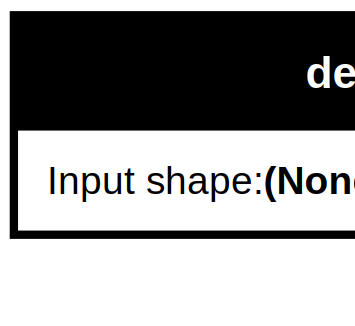

In [176]:

from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot # type: ignore
from tensorflow.keras.utils import model_to_dot

from tensorflow.python.keras.utils.np_utils import to_categorical
SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [177]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam',           #优化器
            loss = 'binary_crossentropy', #损失函数  
            metrics = ['acc'])       #评估指标

In [178]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集,这里为了简化模型，直接用测试集数据进行验证

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - acc: 0.6630 - loss: 490.8738 - val_acc: 0.4240 - val_loss: 43.1089
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - acc: 0.6798 - loss: 16.1094 - val_acc: 0.7430 - val_loss: 26.7811
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - acc: 0.6732 - loss: 20.9197 - val_acc: 0.6345 - val_loss: 61.2186
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - acc: 0.6847 - loss: 37.5508 - val_acc: 0.4655 - val_loss: 42.8792
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - acc: 0.6800 - loss: 20.1492 - val_acc: 0.4720 - val_loss: 14.8506
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - acc: 0.6717 - loss: 34.8884 - val_acc: 0.7870 - val_loss: 18.3085
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - acc: 0.6873 - loss: 18.8220 - val_acc: 0.4865 - val_loss: 2.7740
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - acc: 0.6835 - loss: 18.0313 - val_acc: 0.5535 - val_loss: 26.4033
Epoch 9/30
125/125 ━━━━━

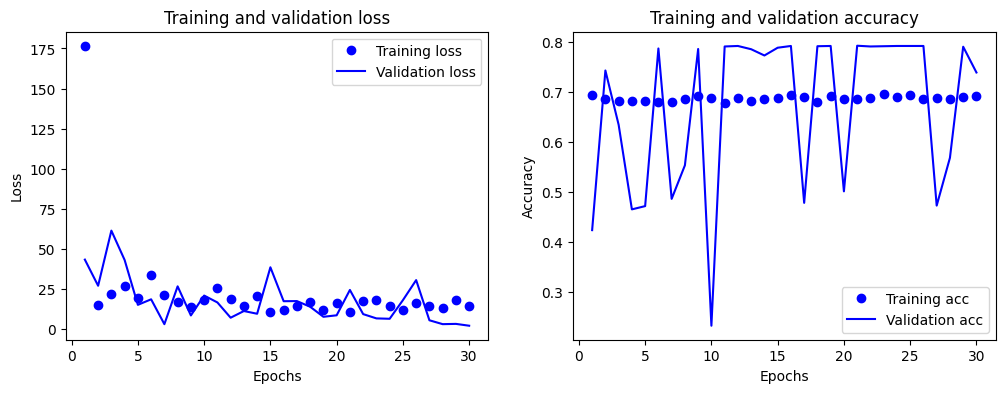

In [179]:
# 这段代码参考《Python深度学习》一书中的学习曲线的实现
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

In [180]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


In [181]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    if y_test.shape != (2000,1):
        y_test = y_test.values # 把Panda series转换成Numpy array
        y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状 
    print(classification_report(y_test,y_pred,labels=[0, 1])) #调用分类报告   

In [182]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("ANN Confusion Matrix") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

**特征缩放（Feature Scaling）**

In [183]:
# mean = X_train.mean(axis=0) # 计算训练集均值
# X_train -= mean # 训练集减去训练集均值
# std = X_train.std(axis=0) # 计算训练集方差
# X_train /= std # 训练集除以训练集标准差
# X_test -= mean # 测试集减去训练集均值
# X_test /= std # 测试集减去训练集均值

In [184]:
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
X_train = sc.fit_transform(X_train) # 拟合并应用于训练集
X_test = sc.transform (X_test) # 训练集结果应用于测试集

In [185]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 80.50%


**特征工程后重新调用神经网络**

In [186]:
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7582 - loss: 0.5332 - val_acc: 0.8055 - val_loss: 0.4468
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - acc: 0.8053 - loss: 0.4412 - val_acc: 0.8090 - val_loss: 0.4357
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - acc: 0.8094 - loss: 0.4278 - val_acc: 0.8130 - val_loss: 0.4261
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - acc: 0.8227 - loss: 0.4099 - val_acc: 0.8160 - val_loss: 0.4194
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - acc: 0.8086 - loss: 0.4283 - val_acc: 0.8205 - val_loss: 0.4172
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - acc: 0.8170 - loss: 0.4168 - val_acc: 0.8235 - val_loss: 0.4126
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - acc: 0.8281 - loss: 0.4096 - val_acc: 0.8290 - val_loss: 0.4099
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - acc: 0.8241 - loss: 0.4087 - val_acc: 0.8315 - val_loss: 0.4091
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s

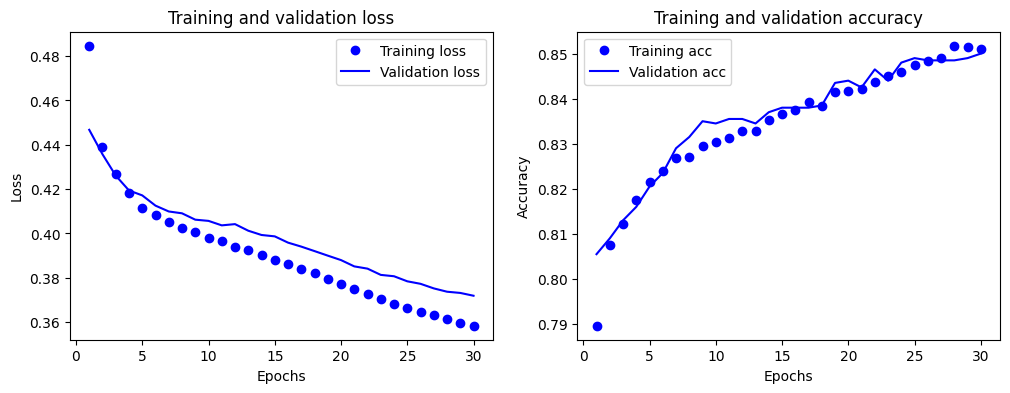

In [187]:
show_history(history)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1583
           1       0.76      0.41      0.53       417

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



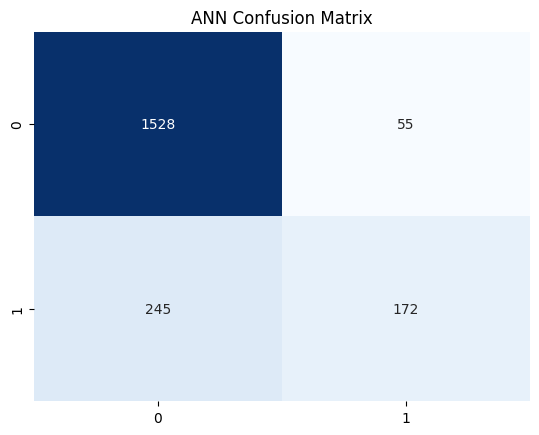

In [188]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**深层神经网络**

In [189]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估指标
ann.compile(optimizer = 'RMSprop', # 优化器
            loss = 'binary_crossentropy', # 损失函数
            metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) # 指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - acc: 0.7759 - loss: 0.5279 - val_acc: 0.8125 - val_loss: 0.4371
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - acc: 0.8159 - loss: 0.4348 - val_acc: 0.8295 - val_loss: 0.4203
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - acc: 0.8295 - loss: 0.4072 - val_acc: 0.8410 - val_loss: 0.4030
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - acc: 0.8422 - loss: 0.3890 - val_acc: 0.8425 - val_loss: 0.3831
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - acc: 0.8553 - loss: 0.3638 - val_acc: 0.8540 - val_loss: 0.3714
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - acc: 0.8585 - loss: 0.3599 - val_acc: 0.8570 - val_loss: 0.3644
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - acc: 0.8568 - loss: 0.3605 - val_acc: 0.8545 - val_loss: 0.3563
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - acc: 0.8700 - loss: 0.3350 - val_acc: 0.8520 - val_loss: 0.3634
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/st

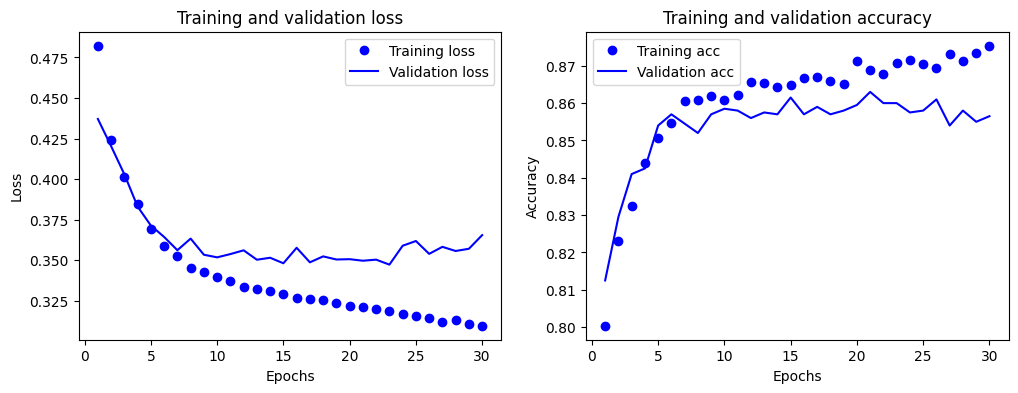

In [190]:
show_history(history)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1583
           1       0.80      0.42      0.55       417

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



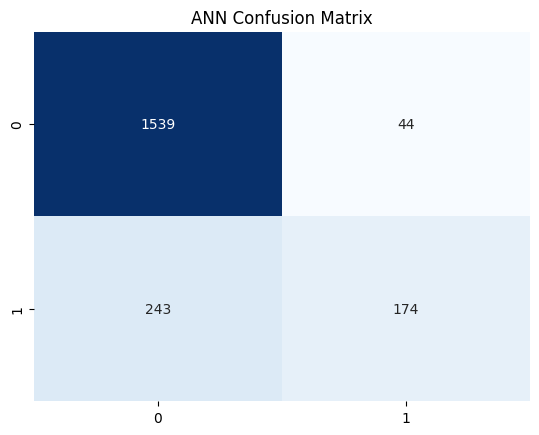

In [191]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**尝试不同的优化器**

In [192]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - acc: 0.7873 - loss: 0.5132 - val_acc: 0.7995 - val_loss: 0.4470
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - acc: 0.8120 - loss: 0.4353 - val_acc: 0.8210 - val_loss: 0.4180
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - acc: 0.8223 - loss: 0.4152 - val_acc: 0.8205 - val_loss: 0.4174
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - acc: 0.8417 - loss: 0.3837 - val_acc: 0.8460 - val_loss: 0.3775
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - acc: 0.8452 - loss: 0.3718 - val_acc: 0.8535 - val_loss: 0.3771
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - acc: 0.8560 - loss: 0.3435 - val_acc: 0.8520 - val_loss: 0.3694
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - acc: 0.8587 - loss: 0.3370 - val_acc: 0.8585 - val_loss: 0.3566
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - acc: 0.8637 - loss: 0.3345 - val_acc: 0.8605 - val_loss: 0.3701
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/st

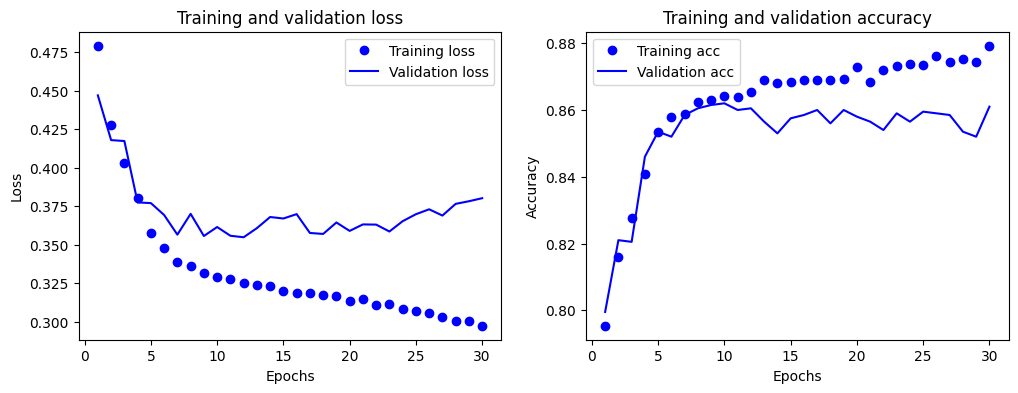

In [193]:
show_history(history)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1583
           1       0.76      0.48      0.59       417

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



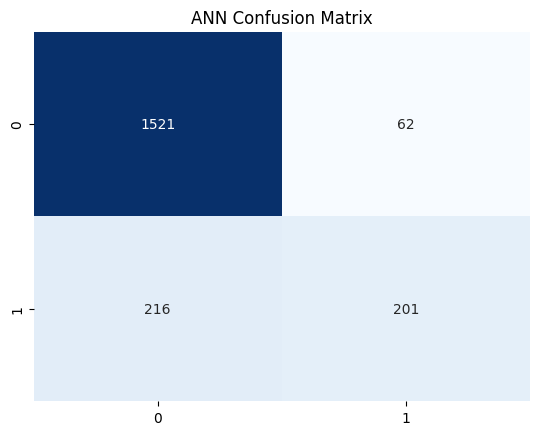

In [194]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

**添加Dropout层**

In [195]:
# from keras.layers import Dropout # 导入Dropout
# ann = Sequential() # 创建一个序贯ANN模型
# ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
# ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# # 编译神经网络，指定优化器，损失函数，以及评估标准
# ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
# history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
# y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
# y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [196]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
              loss = 'binary_crossentropy', #损失函数 
              metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - acc: 0.7648 - loss: 0.5650 - val_acc: 0.7915 - val_loss: 0.5022
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - acc: 0.8010 - loss: 0.5007 - val_acc: 0.7915 - val_loss: 0.5001
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - acc: 0.7971 - loss: 0.4896 - val_acc: 0.7915 - val_loss: 0.4902
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - acc: 0.7980 - loss: 0.4788 - val_acc: 0.7915 - val_loss: 0.4760
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - acc: 0.8012 - loss: 0.4620 - val_acc: 0.7915 - val_loss: 0.4674
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - acc: 0.7967 - loss: 0.4657 - val_acc: 0.7915 - val_loss: 0.4595
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - acc: 0.7913 - loss: 0.4686 - val_acc: 0.7915 - val_loss: 0.4893
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - acc: 0.8000 - loss: 0.4498 - val_acc: 0.7915 - val_loss: 0.4930
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/st

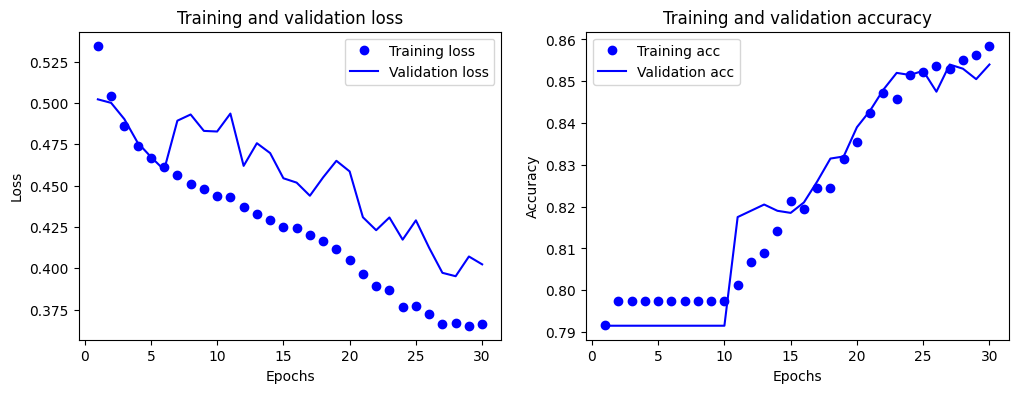

In [197]:
show_history(history)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1583
           1       0.71      0.51      0.59       417

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



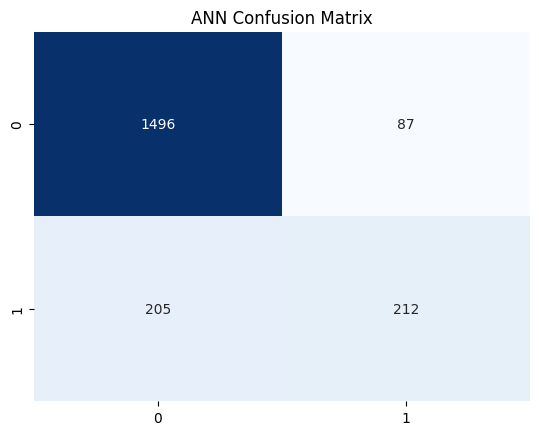

In [198]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)